In [1]:
#https://lscsoft.docs.ligo.org/bilby/making_priors.html
import bilby
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from bilby.core.prior import Uniform, Sine, Cosine, PowerLaw, Constraint

prior_gw150914 = dict(mass_ratio = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.125, maximum=1),
                    chirp_mass = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=25, maximum=31),
                    mass_1 = Constraint(name='mass_1', minimum=10, maximum=80),
                    mass_2 = Constraint(name='mass_2', minimum=10, maximum=80),
                    a_1 = Uniform(name='a_1', minimum=0, maximum=0.99),
                    a_2 = Uniform(name='a_2', minimum=0, maximum=0.99),
                    tilt_1 = Sine(name='tilt_1'),
                    tilt_2 = Sine(name='tilt_2'),
                    phi_12 = Uniform(name='phi_12', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    phi_jl = Uniform(name='phi_jl', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    luminosity_distance = PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000, unit='Mpc', latex_label='$d_L$'),
                    dec =  Cosine(name='dec'),
                    ra =  Uniform(name='ra', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    theta_jn =  Sine(name='theta_jn'),
                    psi =  Uniform(name='psi', minimum=0, maximum=np.pi, boundary='periodic'),
                    phase =  Uniform(name='phase', minimum=0, maximum=2 * np.pi, boundary='periodic'))

In [3]:
mass_1 =prior_gw150914['mass_1'].sample(10)
print(type(mass_1))
mass_ratio = prior_gw150914['mass_ratio'].sample(10)
print(mass_ratio)

<class 'NoneType'>
[0.1387682  0.45439666 0.17790243 0.27424096 0.34051391 0.41495019
 0.59587024 0.33117911 0.17242053 0.36018639]


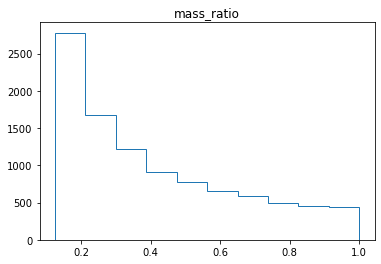

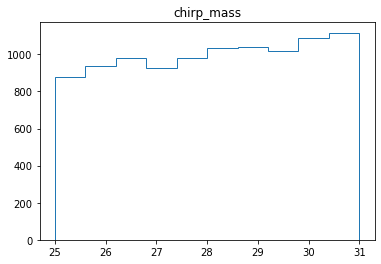

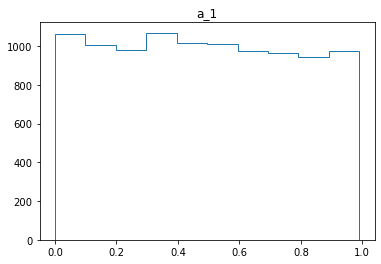

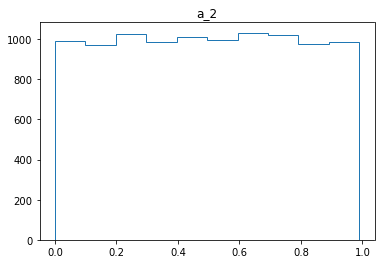

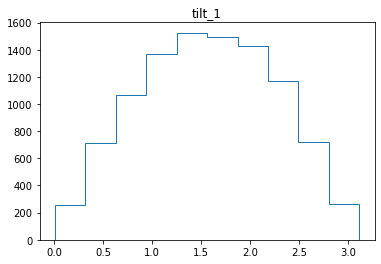

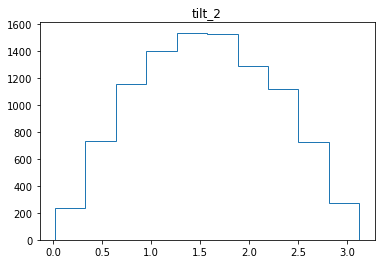

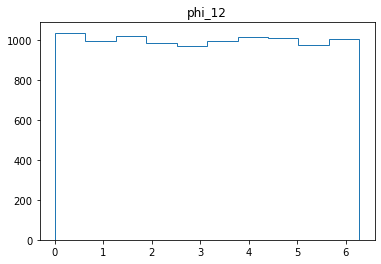

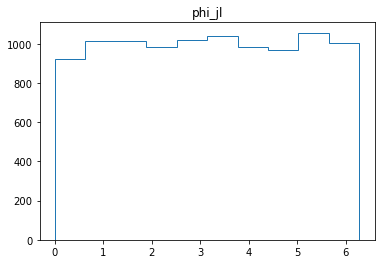

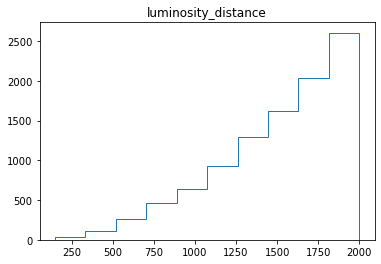

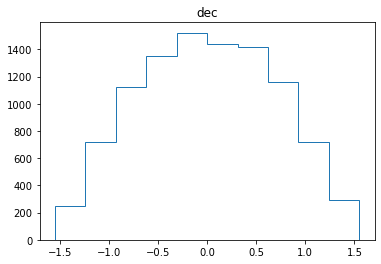

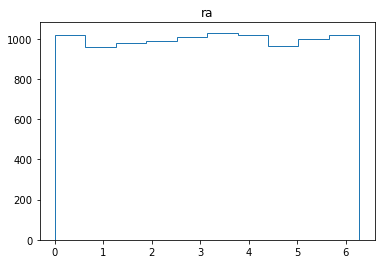

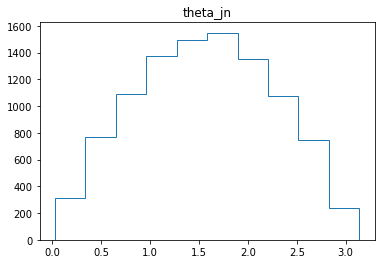

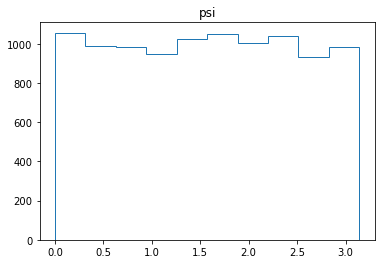

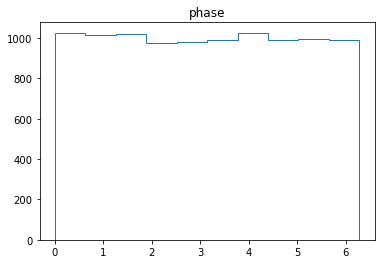

In [4]:
import pylab
%matplotlib inline

for key in prior_gw150914:
    if key in ['mass_1', 'mass_2']:
        pass
    else:
        pylab.title(key)
        pylab.hist(prior_gw150914[key].sample(10000), histtype="step" )
        pylab.show()

In [31]:
# generate mass 1 and mass 2
def gen_masses(prior):
    max_1 = prior['mass_1'].maximum
    max_2 = prior['mass_2'].maximum
    min_1 = prior['mass_1'].minimum
    min_2 = prior['mass_2'].minimum
    
    chirp = prior['chirp_mass'].sample(1)
    ratio = prior['mass_ratio'].sample(1)
    
    mass_1 = chirp*(ratio)**(2/5)*(1+ratio)**(1/5)
    mass_2 = mass_1/ratio
    
    assert(int(mass_1/mass_2) == int(ratio))
    assert(int((mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)) == int(chirp))
    
    if (mass_1 >= max_1) or (mass_2 >= max_2) or (mass_1 <= min_1) or (mass_2 <= min_2):
        return (None, None)
    
    return (float(mass_1), float(mass_2))


In [32]:
def sample_masses(n, prior):
    mass_1_s = []
    mass_2_s = []
    for i in range(n):
        m1, m2 = gen_masses(prior)
        while m1 == None:
            m1, m2 = gen_masses(prior)
        mass_1_s.append(m1)
        mass_2_s.append(m2)
    
    return mass_1_s, mass_2_s

In [35]:
m1, m2 = sample_masses(10000, prior_gw150914)

(array([ 629., 1521., 1291., 1166., 1084.,  961.,  921.,  863.,  843.,
         721.]),
 array([28.86340011, 33.97655203, 39.08970395, 44.20285586, 49.31600778,
        54.42915969, 59.54231161, 64.65546353, 69.76861544, 74.88176736,
        79.99491927]),
 [<matplotlib.patches.Polygon at 0x146ebfb80>])

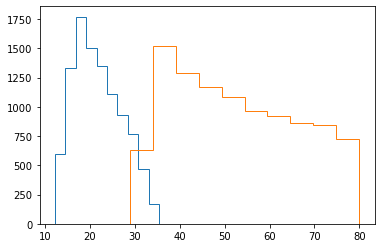

In [36]:
pylab.hist(m1, histtype="step" )
pylab.hist(m2, histtype="step" )

Text(0, 0.5, 'mass 2')

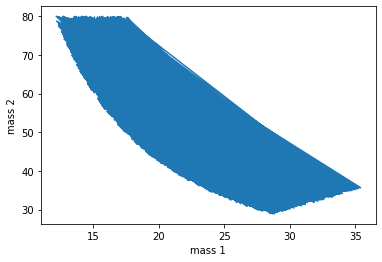

In [38]:
pylab.plot(m1, m2)
pylab.xlabel("mass 1")
pylab.ylabel("mass 2")